In [19]:
%display latex

# Control Gates Spanning Multiple Qubits

## Introduction

Two qubit gates where the control qubit and the controlled qubit are no longer adjacent, as in the $C_u$ case.
In matrix notation and for a general unitary operator $U=\begin{bmatrix}u_{11} & u_{12} \\ u_{21} & u_{22}\end{bmatrix}$ we have $C_{u} = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 &0 \\  0 & 0 & u_{11} & u_{12} \\ 0 & 0 & u_{21} & u_{22} \end{bmatrix}$

In this case the control qubit is $|q_{0}>$ (or $q_0$) and the controlled qubit is $|q_1>$ (or $q_1$).

If the controlled qubit is $|q_{n}>$ (i.e. we have n qubits with the lowest indexed qubit $q_{0}$ controlling the application of some unitary operator $U$ on the $(n-1)^{th}$ qubit) we can apply a series of swap gates to convert the problem to the application of an adjacent $C_u$ operator.

Define :

$Q = \displaystyle{\prod_{k=1}^{n-2}} \;\; I^{n-k-2} \otimes S \otimes I^{k}$ 

$Q^{\dagger} = \displaystyle{\prod_{k=n-2}^{1}} \;\; I^{n-k-2} \otimes S \otimes I^{k} = \displaystyle{\prod_{k=1}^{n-2}} \;\; I^{k-1} \otimes S \otimes I^{n - 1 - k}$ 

$P = I^{n-2} \otimes C_{u}$

$W = I^{n-2} \otimes S$

I is the $2 \times 2$ identity matrix and $S=\begin{bmatrix} 1&0&0&0 \\ 0&0&1&0 \\ 0&1&0&0 \\ 0&0&0&1 \end{bmatrix}$ is the swap matrix. I have used the convention that $I^{0} = 1$ and effectively can be ignored.


Expressing the operation of a non-adjacent qubit controlled $U$ ($\bar{C}_{u,n}$) in terms of an adjacent qubit gate is :

$\bar{C}_{u,n} = Q^{\dagger} \times P \times Q$

If the control and controlled qubit are flipped (i.e. $q_{n-1}$ controls the operation $U q_{0}$) than we have :

$\tilde{C}_{u,n} = Q^{\dagger} \times W^{\dagger} \times P \times W \times Q$

Note that $W^{\dagger} = W$ and that $W$ effectively swaps the role of $q_{0}$ and $q_{1}$.

## Consider the case n=3. 

In that case :

$Q = S \otimes I$

$Q^{\dagger} = S \otimes I$

$W = I \otimes S $

$P = I \otimes C_{u}$

so that :

$\bar{C}_{u,3} = Q^{\dagger} \times P \times Q = (S \otimes I) \times (I \otimes C_{u}) \times (I \otimes S)$

$\tilde{C}_{u,3} = Q^{\dagger} \times W \times P \times W \times Q = (S \otimes I) \times (I \otimes S) \times (I \otimes C_{u}) \times (I \otimes S) \times (I \otimes S)$

Define the identity and swap matrix

In [20]:
I = matrix.identity(2)
S = matrix([[1,0,0,0],[0,0,1,0],[0,1,0,0],[0,0,0,1]])
I,S

(
       [1 0 0 0]
       [0 0 1 0]
[1 0]  [0 1 0 0]
[0 1], [0 0 0 1]
)

Define the $C_u$ matrix

In [21]:
u11,u12,u21,u22=var('u11,u12,u21,u22')
C_u=matrix([[1,0,0,0],[0,1,0,0],[0,0,u11,u12],[0,0,u21,u22]])
C_u

[  1   0   0   0]
[  0   1   0   0]
[  0   0 u11 u12]
[  0   0 u21 u22]

Define the qubit as a tensor product of three single qubits $q_{0}$ through $q_2$ as 

$ q = q_0 \otimes q_1 \otimes q_2 $

$q_i = \begin{bmatrix} q_{i0} \\ q_{i1} \end{bmatrix}$ with $q_{i0}$ and $q_{i1}$ constrained by

$q_{i0} + q_{i1} = 1 $

$q_{i0} \times q_{i1} = 0$

$q_{io}, q_{i1} \in \{0,1\}$

In [22]:
q00,q01,q10,q11,q20,q21=var('q00,q01,q10,q11,q20,q21')

q0=matrix([[q00],[q01]])
q1=matrix([[q10],[q11]])
q2=matrix([[q20],[q21]])
q=q0.tensor_product(q1).tensor_product(q2)
q

[q00*q10*q20]
[q00*q10*q21]
[-----------]
[q00*q11*q20]
[q00*q11*q21]
[-----------]
[q01*q10*q20]
[q01*q10*q21]
[-----------]
[q01*q11*q20]
[q01*q11*q21]

In [23]:
Q =S.tensor_product(I)
Q_dagger=S.tensor_product(I)
W  = I.tensor_product(S) 
P  = I.tensor_product(C_u)
Q,Q_dagger,W,P

(
[1 0|0 0|0 0|0 0]  [1 0|0 0|0 0|0 0]                   
[0 1|0 0|0 0|0 0]  [0 1|0 0|0 0|0 0]                   
[---+---+---+---]  [---+---+---+---]  [1 0 0 0|0 0 0 0]
[0 0|0 0|1 0|0 0]  [0 0|0 0|1 0|0 0]  [0 0 1 0|0 0 0 0]
[0 0|0 0|0 1|0 0]  [0 0|0 0|0 1|0 0]  [0 1 0 0|0 0 0 0]
[---+---+---+---]  [---+---+---+---]  [0 0 0 1|0 0 0 0]
[0 0|1 0|0 0|0 0]  [0 0|1 0|0 0|0 0]  [-------+-------]
[0 0|0 1|0 0|0 0]  [0 0|0 1|0 0|0 0]  [0 0 0 0|1 0 0 0]
[---+---+---+---]  [---+---+---+---]  [0 0 0 0|0 0 1 0]
[0 0|0 0|0 0|1 0]  [0 0|0 0|0 0|1 0]  [0 0 0 0|0 1 0 0]
[0 0|0 0|0 0|0 1], [0 0|0 0|0 0|0 1], [0 0 0 0|0 0 0 1],

[  1   0   0   0|  0   0   0   0]
[  0   1   0   0|  0   0   0   0]
[  0   0 u11 u12|  0   0   0   0]
[  0   0 u21 u22|  0   0   0   0]
[---------------+---------------]
[  0   0   0   0|  1   0   0   0]
[  0   0   0   0|  0   1   0   0]
[  0   0   0   0|  0   0 u11 u12]
[  0   0   0   0|  0   0 u21 u22]
)

In [24]:
C_u3  = Q_dagger * P * Q
CC_u3 = Q_dagger * W * P * W * Q
C_u3, CC_u3

(
[  1   0   0   0   0   0   0   0]  [  1   0   0   0   0   0   0   0]
[  0   1   0   0   0   0   0   0]  [  0 u11   0   0   0 u12   0   0]
[  0   0   1   0   0   0   0   0]  [  0   0   1   0   0   0   0   0]
[  0   0   0   1   0   0   0   0]  [  0   0   0 u11   0   0   0 u12]
[  0   0   0   0 u11 u12   0   0]  [  0   0   0   0   1   0   0   0]
[  0   0   0   0 u21 u22   0   0]  [  0 u21   0   0   0 u22   0   0]
[  0   0   0   0   0   0 u11 u12]  [  0   0   0   0   0   0   1   0]
[  0   0   0   0   0   0 u21 u22], [  0   0   0 u21   0   0   0 u22]
)

In [25]:
C_u3*q

[                      q00*q10*q20]
[                      q00*q10*q21]
[                      q00*q11*q20]
[                      q00*q11*q21]
[q01*q10*q20*u11 + q01*q10*q21*u12]
[q01*q10*q20*u21 + q01*q10*q21*u22]
[q01*q11*q20*u11 + q01*q11*q21*u12]
[q01*q11*q20*u21 + q01*q11*q21*u22]

In [26]:
CC_u3*q

[                      q00*q10*q20]
[q00*q10*q21*u11 + q01*q10*q21*u12]
[                      q00*q11*q20]
[q00*q11*q21*u11 + q01*q11*q21*u12]
[                      q01*q10*q20]
[q00*q10*q21*u21 + q01*q10*q21*u22]
[                      q01*q11*q20]
[q00*q11*q21*u21 + q01*q11*q21*u22]

## Consider the case n=4 

For the n=4 case we have :

$Q = \displaystyle{\prod_{k=1}^{2}} \;\; I^{2-k} \otimes S \otimes I^{k} = (I \otimes S \otimes I)\times(S \otimes I^2)$ 

$Q^{\dagger} = (S \otimes I^2) \times (I \otimes S \otimes I)$

$P = I^2 \otimes C_u$

$W = I^2 \otimes S$

so that :

$\bar{C}_{u,4} = Q^{\dagger} \times P \times Q = (S \otimes I^2) \times (I \otimes S \otimes I) \times (I^2 \otimes C_u) \times (I \otimes S \otimes I)\times(S \otimes I^2)$

$\tilde{C}_{u,4} = Q^{\dagger} \times W \times P \times W \times Q = (S \otimes I^2) \times (I \otimes S \otimes I)\times (I^2 \otimes S) \times (I^2 \otimes C_u) \times (I^2 \otimes S) \times (I \otimes S \otimes I)\times(S \otimes I^2)$

In [27]:
#S * I^2
a = S.tensor_product(matrix.identity(2)).tensor_product(matrix.identity(2))

#I * S * I

b = matrix.identity(2).tensor_product(S).tensor_product(matrix.identity(2))

# I^2 * S
w = matrix.identity(2).tensor_product(matrix.identity(2)).tensor_product(S)

# I^2 * C_u

p = matrix.identity(2).tensor_product(matrix.identity(2)).tensor_product(C_u)

C_u4 = a * b * p * b * a

CC_u4 = a * b * w * p * w * b * a

C_u4, CC_u4

(
[  1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
[  0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
[  0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0 u11 u12   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0 u21 u22   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0 u11 u12   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0 u21 u22   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0 u11 u12   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0 u21 u22   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0 u11 u12]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0 u21 u22],

[  1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
[  0 u11   0   0   0   0   0   0   0 u12   0   0   0   0   0   0]
[  0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0]
[  0   0   0 u11   0   0   0   0   0   0   0 u12   0   0   0   0]
[  0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0 u11   0   0   0   0   0   0   0 u12   0   0]
[  0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0 u11   0   0   0   0   0   0   0 u12]
[  0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0]
[  0 u21   0   0   0   0   0   0   0 u22   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0]
[  0   0   0 u21   0   0   0   0   0   0   0 u22   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0]
[  0   0   0   0   0 u21   0   0   0   0   0   0   0 u22   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0]
[  0   0   0   0   0   0   0 u21   0   0   0   0   0   0   0 u22]
)

In [28]:
q30,q31=var('q30,q31')
q3=matrix([[q30],[q31]])
q=q0.tensor_product(q1).tensor_product(q2).tensor_product(q3)
q

[q00*q10*q20*q30]
[q00*q10*q20*q31]
[---------------]
[q00*q10*q21*q30]
[q00*q10*q21*q31]
[---------------]
[q00*q11*q20*q30]
[q00*q11*q20*q31]
[---------------]
[q00*q11*q21*q30]
[q00*q11*q21*q31]
[---------------]
[q01*q10*q20*q30]
[q01*q10*q20*q31]
[---------------]
[q01*q10*q21*q30]
[q01*q10*q21*q31]
[---------------]
[q01*q11*q20*q30]
[q01*q11*q20*q31]
[---------------]
[q01*q11*q21*q30]
[q01*q11*q21*q31]

In [29]:
C_u4*q

[                          q00*q10*q20*q30]
[                          q00*q10*q20*q31]
[                          q00*q10*q21*q30]
[                          q00*q10*q21*q31]
[                          q00*q11*q20*q30]
[                          q00*q11*q20*q31]
[                          q00*q11*q21*q30]
[                          q00*q11*q21*q31]
[q01*q10*q20*q30*u11 + q01*q10*q20*q31*u12]
[q01*q10*q20*q30*u21 + q01*q10*q20*q31*u22]
[q01*q10*q21*q30*u11 + q01*q10*q21*q31*u12]
[q01*q10*q21*q30*u21 + q01*q10*q21*q31*u22]
[q01*q11*q20*q30*u11 + q01*q11*q20*q31*u12]
[q01*q11*q20*q30*u21 + q01*q11*q20*q31*u22]
[q01*q11*q21*q30*u11 + q01*q11*q21*q31*u12]
[q01*q11*q21*q30*u21 + q01*q11*q21*q31*u22]

In [30]:
CC_u4 * q

[                          q00*q10*q20*q30]
[q00*q10*q20*q31*u11 + q01*q10*q20*q31*u12]
[                          q00*q10*q21*q30]
[q00*q10*q21*q31*u11 + q01*q10*q21*q31*u12]
[                          q00*q11*q20*q30]
[q00*q11*q20*q31*u11 + q01*q11*q20*q31*u12]
[                          q00*q11*q21*q30]
[q00*q11*q21*q31*u11 + q01*q11*q21*q31*u12]
[                          q01*q10*q20*q30]
[q00*q10*q20*q31*u21 + q01*q10*q20*q31*u22]
[                          q01*q10*q21*q30]
[q00*q10*q21*q31*u21 + q01*q10*q21*q31*u22]
[                          q01*q11*q20*q30]
[q00*q11*q20*q31*u21 + q01*q11*q20*q31*u22]
[                          q01*q11*q21*q30]
[q00*q11*q21*q31*u21 + q01*q11*q21*q31*u22]

In [31]:
q.substitute(q00=0,q01=1,q30=1)

[          0]
[          0]
[          0]
[          0]
[          0]
[          0]
[          0]
[          0]
[    q10*q20]
[q10*q20*q31]
[    q10*q21]
[q10*q21*q31]
[    q11*q20]
[q11*q20*q31]
[    q11*q21]
[q11*q21*q31]

In [32]:
qq=q.substitute(q00=0,q01=1,  q10=0, q11=1, q20=0,q21=1, q30=1, q31=0)
qq, C_u4 * qq

(
[0]  [  0]
[0]  [  0]
[0]  [  0]
[0]  [  0]
[0]  [  0]
[0]  [  0]
[0]  [  0]
[0]  [  0]
[0]  [  0]
[0]  [  0]
[0]  [  0]
[0]  [  0]
[0]  [  0]
[0]  [  0]
[1]  [u11]
[0], [u21]
)

In [33]:
qq=q.substitute(q00=1,q01=0,  q10=0, q11=1, q20=0,q21=1, q30=0, q31=1)
qq, CC_u4 * qq

(
[0]  [  0]
[0]  [  0]
[0]  [  0]
[0]  [  0]
[0]  [  0]
[0]  [  0]
[0]  [  0]
[1]  [u11]
[0]  [  0]
[0]  [  0]
[0]  [  0]
[0]  [  0]
[0]  [  0]
[0]  [  0]
[0]  [  0]
[0], [u21]
)

# Application : Quantum Risk Analysis

This is an analysis of arxiv:1806.06893v1 / Quantum Risk Analysis ; S. Woerner and D.J. Egger

The basic circuit is an amplitude estimation circuit of a unitary operator $\mathscr A$.

Below I deal specifically with *section IV : T-Bill on a single period binomial tree*.

We have the following operators :

$\mathscr{A} = R_y(\theta_p)$ where $R_y(\theta) = \exp ^{-i \frac{\theta}{2} Y}$ with $Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}$ the Y Pauli-matrix and $e^{i \theta A} = \cos{\theta} \times I + \sin(\theta) \times A$.


This can be expanded to 
$R_y(\theta_p)= \begin{bmatrix} \cos(\frac{\theta}{2}) & -\sin(\frac{\theta}{2}) \\ \sin(\frac{\theta}{2}) & \cos(\frac{\theta}{2})  \end{bmatrix}$

$\mathscr{A} \; |0>$ is the state whose amplitude we try to measure.

The amplitude estimation operator is $U = \mathscr{A} \: Z \: \mathscr{A}^{\dagger} \: Z$ with the Z Pauli matrix $Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}$. 

We have $U=R_y(2 \theta_{p})$ and $U^{2^{j}} = R_y(2^{j+1} \theta_p)$


The first half of the circuit is described by the following operator working on the initial qubit state $|q_0q_1q_2q_3> = |0000>$ :

$E_1 = \bar{C}_{u^{4},4} \times (I \otimes \bar{C}_{u^{2},3}) \times ( I^{\otimes 2} \otimes C_u)\times (H^{\otimes 3}\otimes R_y(\theta_p)) $

with $\bar{C}_{u,n}$ as defined as above and the Hadamard gate $H = \frac{1}{\sqrt{2}} \begin{bmatrix}1&1\\1&-1 \end{bmatrix}$

### Hadamard Matrix

In [34]:
H = 1/sqrt(2)*matrix([[1,1],[1,-1]])
H

[ 1/2*sqrt(2)  1/2*sqrt(2)]
[ 1/2*sqrt(2) -1/2*sqrt(2)]

### $R_y(\theta)$ rotation matrix

In [35]:
theta_p,u_power = var('theta_p, u_power')
R_y=matrix([[cos(theta_p/2), -sin(theta_p/2)],[sin(theta_p/2), cos(theta_p/2)]])
R_y

[ cos(1/2*theta_p) -sin(1/2*theta_p)]
[ sin(1/2*theta_p)  cos(1/2*theta_p)]

### $Q_n$ operator 

In [36]:
Qn = matrix([[cos(u_power * theta_p), - sin(u_power *theta_p)],[ sin(u_power *theta_p), cos(u_power * theta_p)]])
Qn

[ cos(theta_p*u_power) -sin(theta_p*u_power)]
[ sin(theta_p*u_power)  cos(theta_p*u_power)]

Below I construct the various control gates in terms of nearest neighbour gates

In [37]:
Q=Qn.substitute(u_power=1)
Q2=Qn.substitute(u_power=2)
Q4=Qn.substitute(u_power=4)
Q,Q2,Q4
#Q2[1][1]

(
[ cos(theta_p) -sin(theta_p)]  [ cos(2*theta_p) -sin(2*theta_p)]
[ sin(theta_p)  cos(theta_p)], [ sin(2*theta_p)  cos(2*theta_p)],

[ cos(4*theta_p) -sin(4*theta_p)]
[ sin(4*theta_p)  cos(4*theta_p)]
)

In [38]:
U_q=matrix([[1,0,0,0],[0,1,0,0],[0,0,Q[0][0],Q[0][1]],[0,0,Q[1][0],Q[1][1]]])
U_q3=matrix([[1,0,0,0],[0,1,0,0],[0,0,Q2[0][0],Q2[0][1]],[0,0,Q2[1][0],Q2[1][1]]])
U_q4=matrix([[1,0,0,0],[0,1,0,0],[0,0,Q4[0][0],Q4[0][1]],[0,0,Q4[1][0],Q4[1][1]]])
U_q,U_q3,U_q4

(
[            1             0             0             0]
[            0             1             0             0]
[            0             0  cos(theta_p) -sin(theta_p)]
[            0             0  sin(theta_p)  cos(theta_p)],

[              1               0               0               0]
[              0               1               0               0]
[              0               0  cos(2*theta_p) -sin(2*theta_p)]
[              0               0  sin(2*theta_p)  cos(2*theta_p)],

[              1               0               0               0]
[              0               1               0               0]
[              0               0  cos(4*theta_p) -sin(4*theta_p)]
[              0               0  sin(4*theta_p)  cos(4*theta_p)]
)

In [42]:
# Q_q3 control gate expressed in terms of the U_q3 control gate
Q_q3=S.tensor_product(I) * I.tensor_product(U_q3) * S.tensor_product(I)

# Q_q4 expressed in terms of the U_q4 control gate
a = S.tensor_product(I).tensor_product(I)
b = I.tensor_product(S).tensor_product(I)
p = I.tensor_product(I).tensor_product(U_q4)
Q_q4= a*b*p*b*a

# hadamard gates
H3 = H.tensor_product(H).tensor_product(H)


### First stage of the amplitude estimation circuit

In [44]:
#Stage 1
S1 = H3.tensor_product(R_y)

#Stage 2
S2=I.tensor_product(I).tensor_product(U_q)

#stage 3

S3=I.tensor_product(Q_q3)

#stage 4

S4 = Q_q4


E1 = S4 * S3 * S2 * S1 


### ansatz : $|0000>$

In [45]:
q0=matrix([[1],[0]])
Q0 = q0.tensor_product(q0).tensor_product(q0).tensor_product(q0)

Apply the operator to the inital condition

In [46]:
u_result=E1 * Q0

In [67]:
v=u_result(theta_p = 0) #.simplify_full().simplify_trig()
v

[1/4*sqrt(2)]
[          0]
[1/4*sqrt(2)]
[          0]
[1/4*sqrt(2)]
[          0]
[1/4*sqrt(2)]
[          0]
[1/4*sqrt(2)]
[          0]
[1/4*sqrt(2)]
[          0]
[1/4*sqrt(2)]
[          0]
[1/4*sqrt(2)]
[          0]

Verify that the result is properly normalized

In [48]:
v0 = v[0]*v[0]+v[1]*v[1]+v[2]*v[2]+v[3]*v[3] 
v1 = v[4]*v[4]+v[5]*v[5]+v[6]*v[6]+v[7]*v[7]
v2 = v[8]*v[8]+v[9]*v[9]+v[10]*v[10]+v[11]*v[11] 
v3 = v[12]*v[12]+v[13]*v[13]+v[14]*v[14]+v[15]*v[15]
w=v0 + v1 + v2 + v3
w.simplify_trig()

1

### Inverse QFT : Second stage of the Amplitude Estimation Circuit

The 3 quibit reverse QFT (quantum Fourier transfor) is represented by the following operator :

E_2 = $(H \otimes I^{\otimes 2}) \times (\tilde{C}_{P^{\dagger},2} \otimes I) \times (I \otimes H \otimes I) \times (I \otimes \tilde{C}_{P^{\dagger},2}) \times \tilde{C}_{T^{\dagger},3} \times (I^{\otimes 2} \otimes H) $

We have used the notation $\tilde{C}_{u,n}$ to denote a controlled $U$ gate with the control and affected qubit reversed and with $n-2$ qubit channels in between and with 

+ the conjugate transpose of the phase gate $P^{\dagger} = \begin{bmatrix} 1 & 0 \\ 0 & e^{-i\frac{\pi}{2}} \end{bmatrix}$

+ the conjugate transpose of the $\frac{\pi}{8}$ gate $T^{\dagger} = \sqrt{P^{\dagger}} = \begin{bmatrix} 1 & 0 \\ 0 & e^{-i\frac{\pi}{4}} \end{bmatrix}$

Note that $S$ refers in this to the Swap gate, although S is also used to label the Phase gate. To avoid confusion $P$ is used to refer to the Phase gate matrix.

In terms of regular control gates we have :

$\tilde{C}_{P^{\dagger},2} = S \times \bar{C}_{P^{\dagger},2} \times S$

$\tilde{C}_{T^{\dagger},2} = ( S \otimes I) \times (I \otimes S) \times (I \otimes \bar{C}_{T^{\dagger},2}) \times (I \otimes S) \times (S \otimes I)$


In [49]:
P_dagger = matrix([[1,0],[0, e^(-i*pi/2)]])
P_dagger

[ 1  0]
[ 0 -I]

In [50]:
T_dagger=matrix([[1,0],[0, e^(-i*pi/4)]])
T_dagger

[                     1                      0]
[                     0 -(1/2*I - 1/2)*sqrt(2)]

In [51]:
C_pdagger = matrix([[1,0,0,0], [0,1,0,0], [0,0,P_dagger[0][0], P_dagger[0][1]],[0,0,P_dagger[1][0], P_dagger[1][1]]])
C_pdagger

[ 1  0  0  0]
[ 0  1  0  0]
[ 0  0  1  0]
[ 0  0  0 -I]

In [52]:
C_tdagger = matrix([[1,0,0,0], [0,1,0,0], [0,0,T_dagger[0][0], T_dagger[0][1]],[0,0,T_dagger[1][0], T_dagger[1][1]]])
C_tdagger

[                     1                      0                      0                      0]
[                     0                      1                      0                      0]
[                     0                      0                      1                      0]
[                     0                      0                      0 -(1/2*I - 1/2)*sqrt(2)]

In [54]:
CC_tdagger=(S.tensor_product(I)) * (I.tensor_product(S)) * ( I.tensor_product(C_tdagger)) * (I.tensor_product(S)) * (S.tensor_product(I))
CC_tdagger

[                     1                      0                      0                      0                      0                      0                      0                      0]
[                     0                      1                      0                      0                      0                      0                      0                      0]
[                     0                      0                      1                      0                      0                      0                      0                      0]
[                     0                      0                      0                      1                      0                      0                      0                      0]
[                     0                      0                      0                      0                      1                      0                      0                      0]
[                     0                      0                      0                      0                      0 -(1/2*I - 1/2)*sqrt(2)                      0                      0]
[                     0                      0                      0                      0                      0                      0                      1                      0]
[                     0                      0                      0                      0                      0                      0                      0 -(1/2*I - 1/2)*sqrt(2)]

In [55]:
CC_u3.substitute(u11=T_dagger[0][0],u12=T_dagger[0][1], u21=T_dagger[1][0], u22=T_dagger[1][1])

[                     1                      0                      0                      0                      0                      0                      0                      0]
[                     0                      1                      0                      0                      0                      0                      0                      0]
[                     0                      0                      1                      0                      0                      0                      0                      0]
[                     0                      0                      0                      1                      0                      0                      0                      0]
[                     0                      0                      0                      0                      1                      0                      0                      0]
[                     0                      0                      0                      0                      0 -(1/2*I - 1/2)*sqrt(2)                      0                      0]
[                     0                      0                      0                      0                      0                      0                      1                      0]
[                     0                      0                      0                      0                      0                      0                      0 -(1/2*I - 1/2)*sqrt(2)]

In [56]:
CC_pdagger = S * C_pdagger * S
CC_pdagger

[ 1  0  0  0]
[ 0  1  0  0]
[ 0  0  1  0]
[ 0  0  0 -I]

In [57]:
S1_qft = I.tensor_product(I).tensor_product(H)
S2_qft = CC_tdagger
S3_qft = I.tensor_product(CC_pdagger)
S4_qft = I.tensor_product(H).tensor_product(I)
S5_qft = CC_pdagger.tensor_product(I)
S6_qft = H.tensor_product(I).tensor_product(I)
QFT    = S6_qft * S5_qft * S4_qft * S3_qft * S2_qft * S1_qft
QFT

[   1/4*sqrt(2)    1/4*sqrt(2)    1/4*sqrt(2)    1/4*sqrt(2)    1/4*sqrt(2)    1/4*sqrt(2)    1/4*sqrt(2)    1/4*sqrt(2)]
[   1/4*sqrt(2)   -1/4*sqrt(2) -1/4*I*sqrt(2)  1/4*I*sqrt(2)   -1/4*I + 1/4    1/4*I - 1/4   -1/4*I - 1/4    1/4*I + 1/4]
[   1/4*sqrt(2)    1/4*sqrt(2)   -1/4*sqrt(2)   -1/4*sqrt(2) -1/4*I*sqrt(2) -1/4*I*sqrt(2)  1/4*I*sqrt(2)  1/4*I*sqrt(2)]
[   1/4*sqrt(2)   -1/4*sqrt(2)  1/4*I*sqrt(2) -1/4*I*sqrt(2)   -1/4*I - 1/4    1/4*I + 1/4   -1/4*I + 1/4    1/4*I - 1/4]
[   1/4*sqrt(2)    1/4*sqrt(2)    1/4*sqrt(2)    1/4*sqrt(2)   -1/4*sqrt(2)   -1/4*sqrt(2)   -1/4*sqrt(2)   -1/4*sqrt(2)]
[   1/4*sqrt(2)   -1/4*sqrt(2) -1/4*I*sqrt(2)  1/4*I*sqrt(2)    1/4*I - 1/4   -1/4*I + 1/4    1/4*I + 1/4   -1/4*I - 1/4]
[   1/4*sqrt(2)    1/4*sqrt(2)   -1/4*sqrt(2)   -1/4*sqrt(2)  1/4*I*sqrt(2)  1/4*I*sqrt(2) -1/4*I*sqrt(2) -1/4*I*sqrt(2)]
[   1/4*sqrt(2)   -1/4*sqrt(2)  1/4*I*sqrt(2) -1/4*I*sqrt(2)    1/4*I + 1/4   -1/4*I - 1/4    1/4*I - 1/4   -1/4*I + 1/4]

In [58]:
q3 = matrix([[1],[0]]).tensor_product(matrix([[0],[1]])).tensor_product(matrix([[1],[0]]))
vx=QFT*q3
vx0 = norm(vx[0])*norm(vx[0])+norm(vx[1])*norm(vx[1])+norm(vx[2])*norm(vx[2])+norm(vx[3])*norm(vx[3])
vx1 = norm(vx[4])*norm(vx[4])+norm(vx[5])*norm(vx[5])+norm(vx[6])*norm(vx[6])+norm(vx[7])*norm(vx[7])
vx0 + vx1

1

In [59]:
E2=QFT.tensor_product(I)
E2*Q0

[1/4*sqrt(2)]
[          0]
[-----------]
[1/4*sqrt(2)]
[          0]
[-----------]
[1/4*sqrt(2)]
[          0]
[-----------]
[1/4*sqrt(2)]
[          0]
[-----------]
[1/4*sqrt(2)]
[          0]
[-----------]
[1/4*sqrt(2)]
[          0]
[-----------]
[1/4*sqrt(2)]
[          0]
[-----------]
[1/4*sqrt(2)]
[          0]

### Full Circuit Analysis for n = 3 probe qubits

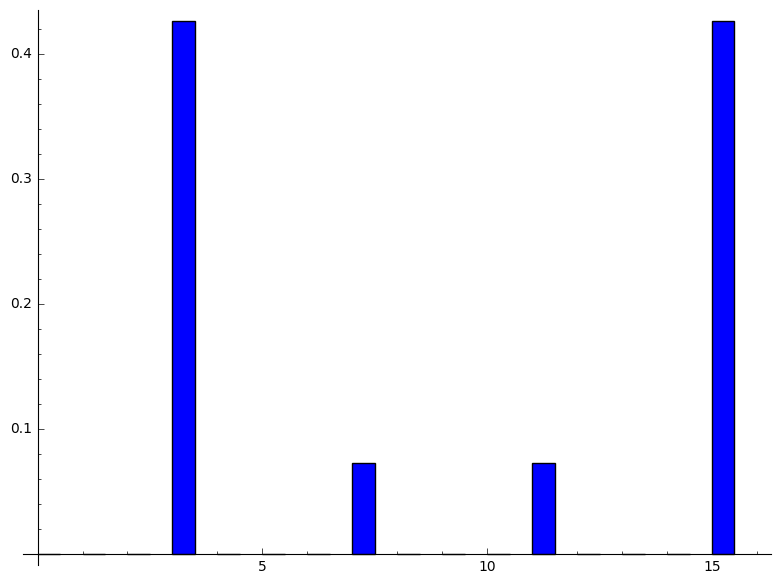

In [68]:
Cr = E2*E1*Q0
theta_p = 2.0*arcsin(sqrt(1.0))
M=Cr(theta_p)
P_2=[numerical_approx(norm(M[index]).simplify_full()*norm(M[index]).simplify_full()) for index in range(16)]
bar_chart(P_2)


In [61]:
P_2[3], P_2[15]


(0.426776695296637, 0.426776695296637)

In [62]:
a=numerical_approx(sin(3.0 * pi/8.0))
a*a

0.853553390593274

In [63]:
b=numerical_approx(sin(15.0 * pi/8.0))
1-b*b

0.853553390593273

In [64]:
P_2[3] + P_2[15]


0.853553390593274

In [65]:
1.0/8.0

0.125000000000000

In [66]:
numerical_approx(pi/8+ (pi*pi)/(8*8))

0.546911650465745